# Plot the yearly frequency graphics

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
%matplotlib inline

cities = {'Bismarck, ND': (-100.773703, 46.801942),
          'Minneapolis, MN': (-93.2650, 44.9778),
          'Albany, NY': (-73.7562, 42.6526),
          'Omaha, NE': (-95.9345, 41.2565),
          'Columbus, OH': (-82.9988, 39.9612),
          'Denver, CO':(-104.9903, 39.7392),
          'St. Louis, MO': (-90.1994, 38.6270),
          'Charlotte, NC': (-80.8431, 35.2271),
          'Oklahoma City, OK':(-97.5164, 35.4676),
          'Tuscaloosa, AL': (-87.5692, 33.2098), 
          'San Antonio, TX': (-98.4936, 29.4241), 
          'Orlando, FL': (-81.3792, 28.5383), 
          }

out_dir = "../figures/yearly_frequency/"

# Generate the city lookup coordinates

In [2]:
coords = xr.open_dataset('../data/nam212.nc')

lats = coords.gridlat_212.values
lons = coords.gridlon_212.values

from scipy.spatial import KDTree
import numpy as np

city_lookup = {}

pts = np.stack([lons.ravel(), lats.ravel()], axis=1)

flons, flats = pts[:, 0], pts[:, 1]

test = np.zeros(shape=(lats.shape))

tree = KDTree(list(zip(flons, flats)))

for key, value in cities.items():
    
    loc = tree.query(value)
    
    idx = np.unravel_index(loc[1], dims=lats.shape)
    
    test[idx] = 1
    
    city_lookup[key] = idx
    
    print(idx, lons[idx], lats[idx], value)
    
city_lookup

(82, 92) -100.91847 46.8055 (-100.773703, 46.801942)
(76, 108) -93.06891 44.845203 (-93.265, 44.9778)
(73, 149) -73.676025 42.597034 (-73.7562, 42.6526)
(66, 102) -95.933105 41.39053 (-95.9345, 41.2565)
(63, 130) -83.031204 39.93604 (-82.9988, 39.9612)
(62, 82) -105.10153 39.699127 (-104.9903, 39.7392)
(58, 115) -90.01058 38.50195 (-90.1994, 38.627)
(50, 136) -80.90761 35.120552 (-80.8431, 35.2271)
(49, 98) -97.64347 35.33841 (-97.5164, 35.4676)
(44, 121) -87.63795 33.391075 (-87.5692, 33.2098)
(33, 96) -98.35003 29.529873 (-98.4936, 29.4241)
(32, 137) -81.27024 28.59184 (-81.3792, 28.5383)


C:\Users\ahaberlie1\AppData\Local\Continuum\anaconda3\envs\r37\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: 'shape' argument should be used instead of 'dims'


{'Bismarck, ND': (82, 92),
 'Minneapolis, MN': (76, 108),
 'Albany, NY': (73, 149),
 'Omaha, NE': (66, 102),
 'Columbus, OH': (63, 130),
 'Denver, CO': (62, 82),
 'St. Louis, MO': (58, 115),
 'Charlotte, NC': (50, 136),
 'Oklahoma City, OK': (49, 98),
 'Tuscaloosa, AL': (44, 121),
 'San Antonio, TX': (33, 96),
 'Orlando, FL': (32, 137)}

# 5% Tornado

In [3]:
import calendar
from datetime import date
import numpy as np
import matplotlib.dates as mdates
import pandas as pd

monthsFmt = mdates.DateFormatter('%b')
months = mdates.MonthLocator()
%matplotlib inline

plt.rcParams['figure.figsize'] = 25, 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20


city_dict = np.zeros(shape=(12, 41))

names = []

dset = xr.open_dataset("../data/tor_day_footprints_79-18_sid-212_grid.nc")

var = 'pp_05'

ct = 0

for name, loc in cities.items():

    y, x = city_lookup[name]
    
    vals = dset[var].sel(y=y, x=x)

    vals = vals.groupby('time.year').sum()

    city_dict[ct, :40] = vals

    city_dict[ct, 40] = np.mean(vals)
    
    names.append(name)

    ct += 1

Define the colors and value map

In [4]:
from matplotlib.colors import BoundaryNorm, ListedColormap

scale = [0, 1, 4, 6, 8, 10, np.max(city_dict)]

colors = ['#ffffff','#fdd49e','#fdbb84','#fc8d59','#e34a33','#b30000']

cmap = ListedColormap(colors)
norm = BoundaryNorm(scale, ncolors=cmap.N)

Plot the graphic

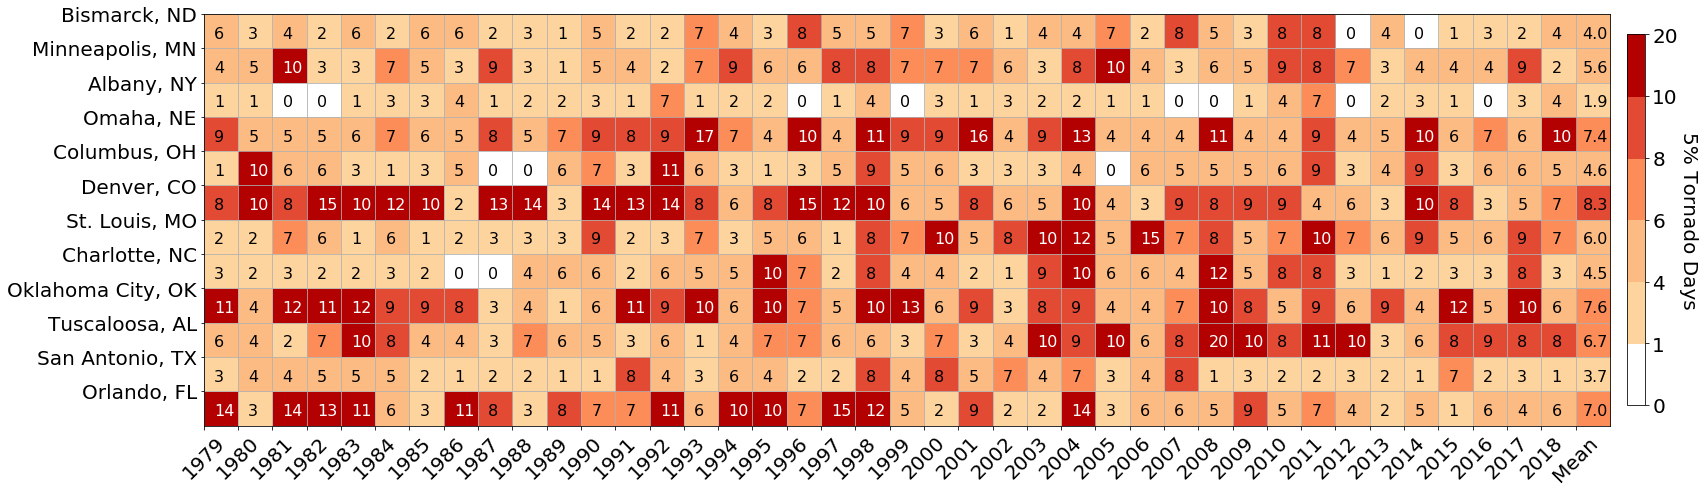

In [6]:
import matplotlib.patheffects as path_effects

plt.rcParams['figure.figsize'] = 30, 30
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20

ax = plt.subplot(2, 1, 1)

mmp = ax.imshow(city_dict,  norm=norm, cmap=cmap)

cbar = plt.colorbar(mmp, ax=ax, shrink=0.5, pad=0.01)
cbar.ax.get_yaxis().labelpad = 20
cbar.ax.set_ylabel('5% Tornado Days', fontsize=20, rotation=270)

yrlab = list(range(1979, 2019))
yrlab.append('Mean')
ax.set_xticks(np.array(list(range(41)))-.5);
ax.set_xticklabels(yrlab, rotation=45)

ax.set_yticks(np.array(list(range(12)))-.5)
ax.set_yticklabels(names)

for i in range(city_dict.shape[0]):
    for j in range(city_dict.shape[1]):
        
        value = city_dict[i, j]
        if j != 40:
            if value < 10:
                txt = ax.text(j-.2, i+.2, int(value), fontsize=16, color='black')
            else:
                txt = ax.text(j-.2, i+.2, int(value), fontsize=16, color='white')
        else:
            if value < 10:
                txt = ax.text(j-.3, i+.2, "{:.1f}".format(value), fontsize=16, color='black')
            else:
                txt = ax.text(j-.3, i+.2, "{:.1f}".format(value), fontsize=16, color='white')
                
ax.yaxis.grid(True, which='both')
ax.xaxis.grid(True, which='both')

plt.savefig(out_dir + "yearly_tor_212a.png", dpi=200, bbox_inches='tight')

# 10% Significant Tornado

In [7]:
city_dict = np.zeros(shape=(12, 41))

names = []

dset = xr.open_dataset("../data/sig_tor_day_footprints_79-18_sid-212_grid.nc")

var = 'pp_10'

ct = 0

for name, loc in cities.items():

    y, x = city_lookup[name]
    
    vals = dset[var].sel(y=y, x=x)

    vals = vals.groupby('time.year').sum()

    city_dict[ct, :40] = vals

    city_dict[ct, 40] = np.mean(vals)
    
    names.append(name)

    ct += 1

In [8]:
from matplotlib.colors import BoundaryNorm, ListedColormap

scale = [0, .1, .25, .33, .5, 1, np.max(city_dict)]

colors = ['#ffffff','#fdd49e','#fdbb84','#fc8d59','#e34a33','#b30000']

cmap = ListedColormap(colors)
norm = BoundaryNorm(scale, ncolors=cmap.N)

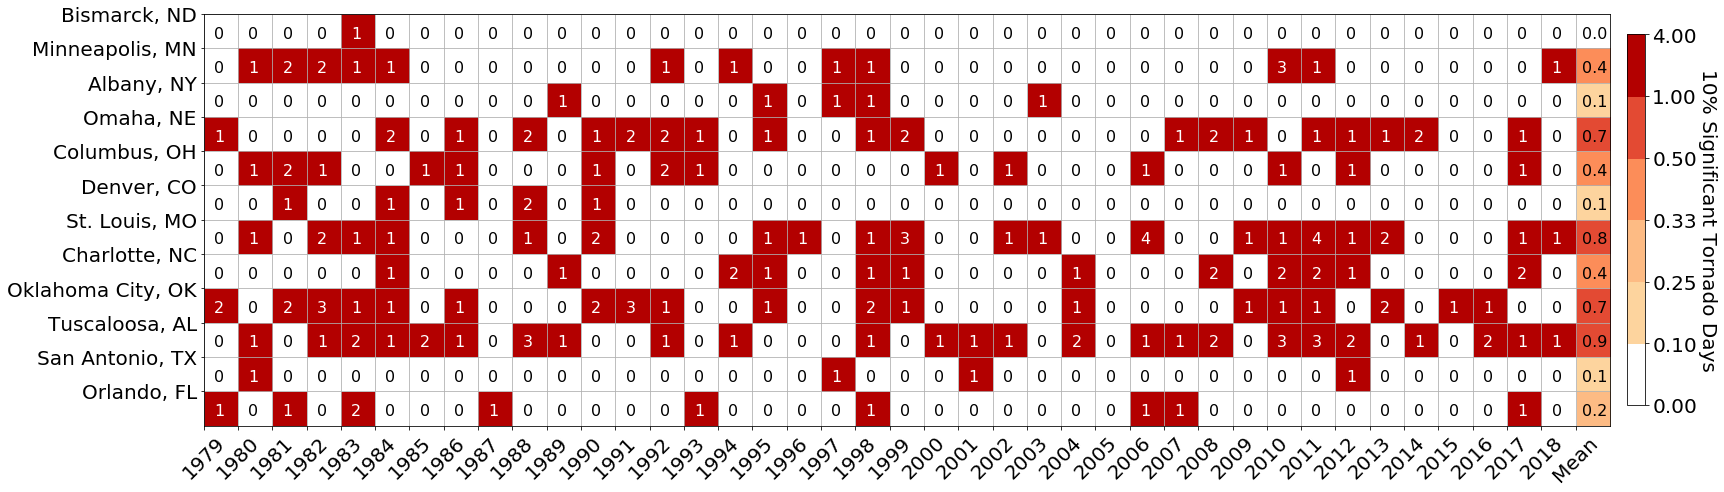

In [9]:
import matplotlib.patheffects as path_effects

plt.rcParams['figure.figsize'] = 30, 30
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20

ax = plt.subplot(2, 1, 1)

mmp = ax.imshow(city_dict,  norm=norm, cmap=cmap)

cbar = plt.colorbar(mmp, ax=ax, shrink=0.5, pad=0.01)
cbar.ax.get_yaxis().labelpad = 20
cbar.ax.set_ylabel('10% Significant Tornado Days', fontsize=20, rotation=270)

yrlab = list(range(1979, 2019))
yrlab.append('Mean')
ax.set_xticks(np.array(list(range(41)))-.5);
ax.set_xticklabels(yrlab, rotation=45)

ax.set_yticks(np.array(list(range(12)))-.5)
ax.set_yticklabels(names)

for i in range(city_dict.shape[0]):
    for j in range(city_dict.shape[1]):
        
        value = city_dict[i, j]
        if j != 40:
            if value < 1:
                txt = ax.text(j-.2, i+.2, int(value), fontsize=16, color='black')
            else:
                txt = ax.text(j-.2, i+.2, int(value), fontsize=16, color='white')
        else:
            if value < 1:
                txt = ax.text(j-.3, i+.2, "{:.1f}".format(value), fontsize=16, color='black')
            else:
                txt = ax.text(j-.3, i+.2, "{:.1f}".format(value), fontsize=16, color='white')
                
ax.yaxis.grid(True, which='both')
ax.xaxis.grid(True, which='both')

plt.savefig(out_dir + "yearly_sig_tor_212.png", dpi=200, bbox_inches='tight')

# 15% Hail

In [10]:
city_dict = np.zeros(shape=(12, 41))

names = []

dset = xr.open_dataset("../data/hail_day_footprints_79-18_sid-212_grid.nc")

var = 'pp_15'

ct = 0

for name, loc in cities.items():

    y, x = city_lookup[name]
    
    vals = dset[var].sel(y=y, x=x)

    vals = vals.groupby('time.year').sum()

    city_dict[ct, :40] = vals

    city_dict[ct, 40] = np.mean(vals)
    
    names.append(name)

    ct += 1

In [11]:
scale = [0,  1,  6, 12,  18, 24, np.max(city_dict)]

colors = ['#ffffff','#d9f0a3','#addd8e','#78c679','#31a354','#006837']

cmap = ListedColormap(colors)
norm = BoundaryNorm(scale, ncolors=cmap.N)

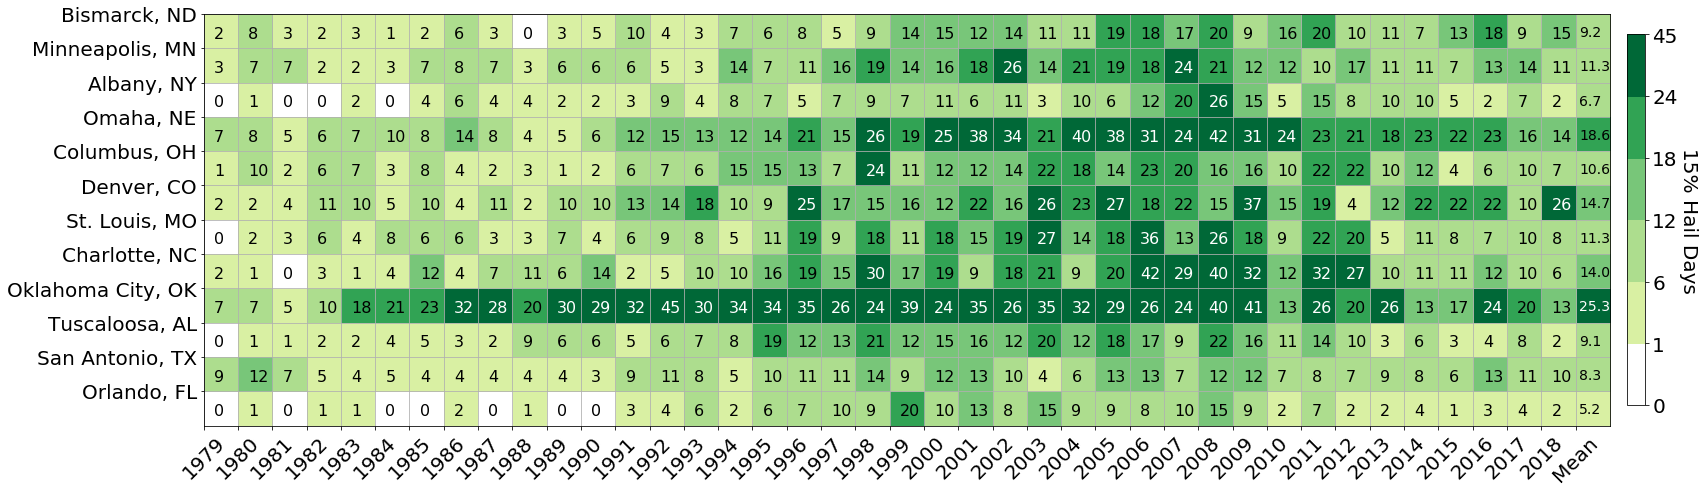

In [12]:
import matplotlib.patheffects as path_effects

plt.rcParams['figure.figsize'] = 30, 30
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20

ax = plt.subplot(2, 1, 1)

mmp = ax.imshow(city_dict,  norm=norm, cmap=cmap)

cbar = plt.colorbar(mmp, ax=ax, shrink=0.5, pad=0.01)
cbar.ax.get_yaxis().labelpad = 20
cbar.ax.set_ylabel('15% Hail Days', fontsize=20, rotation=270)

yrlab = list(range(1979, 2019))
yrlab.append('Mean')
ax.set_xticks(np.array(list(range(41)))-.5);
ax.set_xticklabels(yrlab, rotation=45)

ax.set_yticks(np.array(list(range(12)))-.5)
ax.set_yticklabels(names)

for i in range(city_dict.shape[0]):
    for j in range(city_dict.shape[1]):
        
        value = city_dict[i, j]
        if j != 40:
            if value < 24:
                txt = ax.text(j-.2, i+.2, int(value), fontsize=16, color='black')
            else:
                txt = ax.text(j-.2, i+.2, int(value), fontsize=16, color='white')
        else:
            if value < 24:
                txt = ax.text(j-.4, i+.15, "{:.1f}".format(value), fontsize=14, color='black')
            else:
                txt = ax.text(j-.4, i+.15, "{:.1f}".format(value), fontsize=14, color='white')
                
ax.yaxis.grid(True, which='both')
ax.xaxis.grid(True, which='both')

plt.savefig(out_dir + "yearly_hail_212.png", dpi=200, bbox_inches='tight')

# 10% Significant Hail

In [13]:
city_dict = np.zeros(shape=(12, 41))

names = []

dset = xr.open_dataset("../data/sig_hail_day_footprints_79-18_sid-212_grid.nc")

var = 'pp_10'

ct = 0

for name, loc in cities.items():

    y, x = city_lookup[name]
    
    vals = dset[var].sel(y=y, x=x)

    vals = vals.groupby('time.year').sum()

    city_dict[ct, :40] = vals

    city_dict[ct, 40] = np.mean(vals)
    
    names.append(name)

    ct += 1

In [14]:
scale = [0,  .5,  1, 2, 3, 4, np.max(city_dict)]

colors = ['#ffffff','#d9f0a3','#addd8e','#78c679','#31a354','#006837']

cmap = ListedColormap(colors)
norm = BoundaryNorm(scale, ncolors=cmap.N)

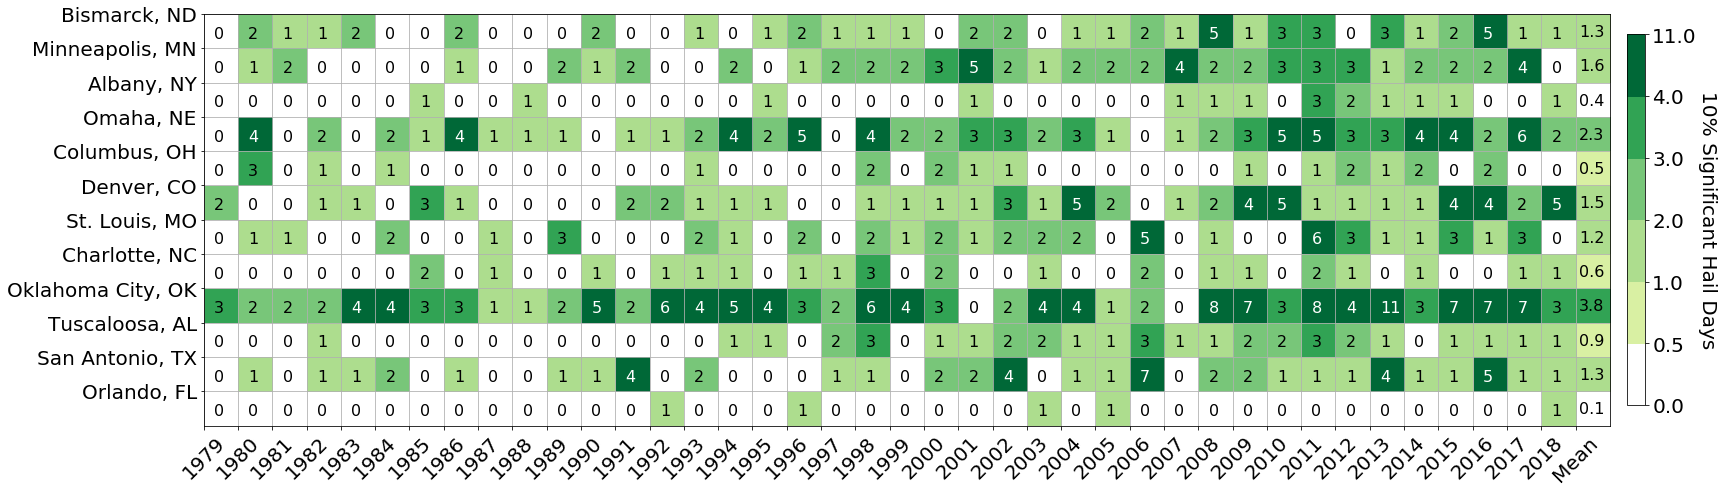

In [15]:
import matplotlib.patheffects as path_effects

plt.rcParams['figure.figsize'] = 30, 30
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20

ax = plt.subplot(2, 1, 1)

mmp = ax.imshow(city_dict,  norm=norm, cmap=cmap)

cbar = plt.colorbar(mmp, ax=ax, shrink=0.5, pad=0.01)
cbar.ax.get_yaxis().labelpad = 20
cbar.ax.set_ylabel('10% Significant Hail Days', fontsize=20, rotation=270)

yrlab = list(range(1979, 2019))
yrlab.append('Mean')
ax.set_xticks(np.array(list(range(41)))-.5);
ax.set_xticklabels(yrlab, rotation=45)

ax.set_yticks(np.array(list(range(12)))-.5)
ax.set_yticklabels(names)

for i in range(city_dict.shape[0]):
    for j in range(city_dict.shape[1]):
        
        value = city_dict[i, j]
        if j != 40:
            if value < 4:
                txt = ax.text(j-.2, i+.2, int(value), fontsize=16, color='black')
            else:
                txt = ax.text(j-.2, i+.2, int(value), fontsize=16, color='white')
        else:
            if value < 4:
                txt = ax.text(j-.4, i+.15, "{:.1f}".format(value), fontsize=16, color='black')
            else:
                txt = ax.text(j-.4, i+.15, "{:.1f}".format(value), fontsize=16, color='white')
                
ax.yaxis.grid(True, which='both')
ax.xaxis.grid(True, which='both')

plt.savefig(out_dir + "yearly_sig_hail_212.png", dpi=200, bbox_inches='tight')

# 15% Wind

In [16]:
city_dict = np.zeros(shape=(12, 41))

names = []

dset = xr.open_dataset("../data/wind_day_footprints_79-18_sid-212_grid.nc")

var = 'pp_15'

ct = 0

for name, loc in cities.items():

    y, x = city_lookup[name]
    
    vals = dset[var].sel(y=y, x=x)

    vals = vals.groupby('time.year').sum()

    city_dict[ct, :40] = vals

    city_dict[ct, 40] = np.mean(vals)
    
    names.append(name)

    ct += 1

In [17]:
scale = [0,  1,  4, 8,  12, 16, np.max(city_dict)]

colors = ['#ffffff','#c6dbef','#9ecae1','#6baed6','#3182bd','#08519c']

cmap = ListedColormap(colors)
norm = BoundaryNorm(scale, ncolors=cmap.N)

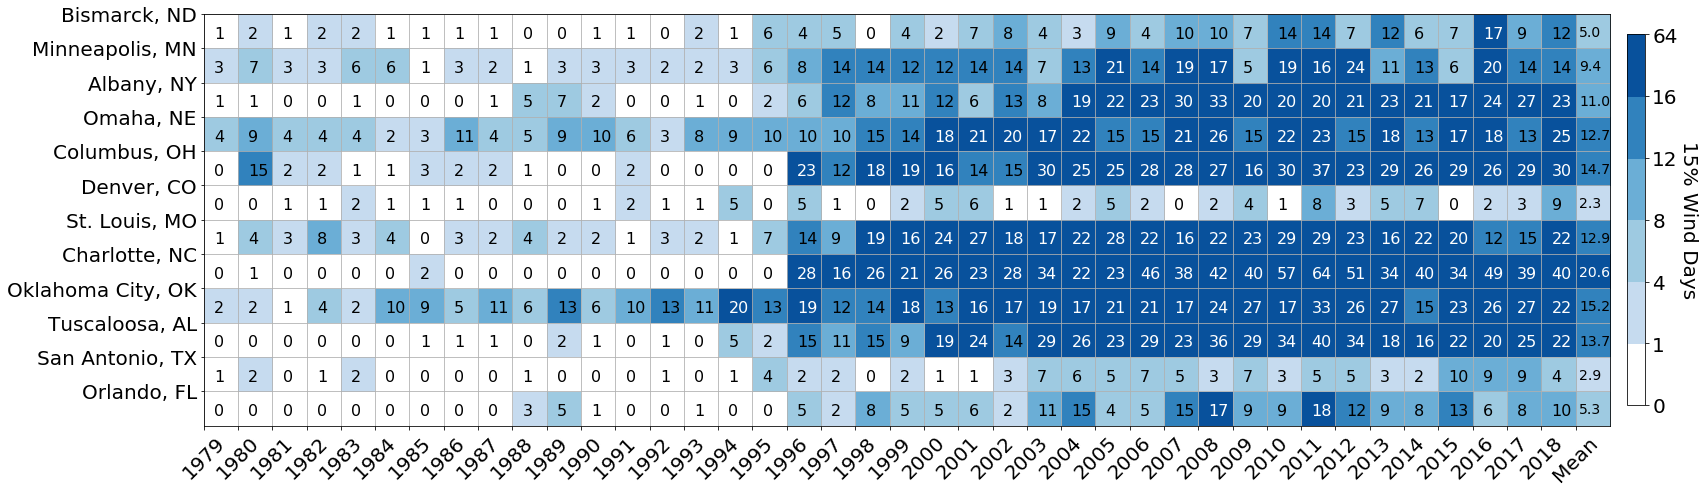

In [18]:
import matplotlib.patheffects as path_effects

plt.rcParams['figure.figsize'] = 30, 30
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20

ax = plt.subplot(2, 1, 1)

mmp = ax.imshow(city_dict,  norm=norm, cmap=cmap)

cbar = plt.colorbar(mmp, ax=ax, shrink=0.5, pad=0.01)
cbar.ax.get_yaxis().labelpad = 20
cbar.ax.set_ylabel('15% Wind Days', fontsize=20, rotation=270)

yrlab = list(range(1979, 2019))
yrlab.append('Mean')
ax.set_xticks(np.array(list(range(41)))-.5);
ax.set_xticklabels(yrlab, rotation=45)

ax.set_yticks(np.array(list(range(12)))-.5)
ax.set_yticklabels(names)

for i in range(city_dict.shape[0]):
    for j in range(city_dict.shape[1]):
        
        value = city_dict[i, j]
        if j != 40:
            if value < 16:
                txt = ax.text(j-.2, i+.2, int(value), fontsize=16, color='black')
            else:
                txt = ax.text(j-.2, i+.2, int(value), fontsize=16, color='white')
        else:
            if value < 16:
                txt = ax.text(j-.4, i+.15, "{:.1f}".format(value), fontsize=14, color='black')
            else:
                txt = ax.text(j-.4, i+.15, "{:.1f}".format(value), fontsize=14, color='white')
                
ax.yaxis.grid(True, which='both')
ax.xaxis.grid(True, which='both')

plt.savefig(out_dir + "yearly_wind_212.png", dpi=200, bbox_inches='tight')

# 10% Significant Wind

In [19]:
city_dict = np.zeros(shape=(12, 41))

names = []

dset = xr.open_dataset("../data/sig_wind_day_footprints_79-18_sid-212_grid.nc")

var = 'pp_10'

ct = 0

for name, loc in cities.items():

    y, x = city_lookup[name]
    
    vals = dset[var].sel(y=y, x=x)

    vals = vals.groupby('time.year').sum()

    city_dict[ct, :40] = vals

    city_dict[ct, 40] = np.mean(vals)
    
    names.append(name)

    ct += 1

In [20]:
scale = [0,  .5,  1, 2,  3, 4, np.max(city_dict)]

colors = ['#ffffff','#c6dbef','#9ecae1','#6baed6','#3182bd','#08519c']

cmap = ListedColormap(colors)
norm = BoundaryNorm(scale, ncolors=cmap.N)

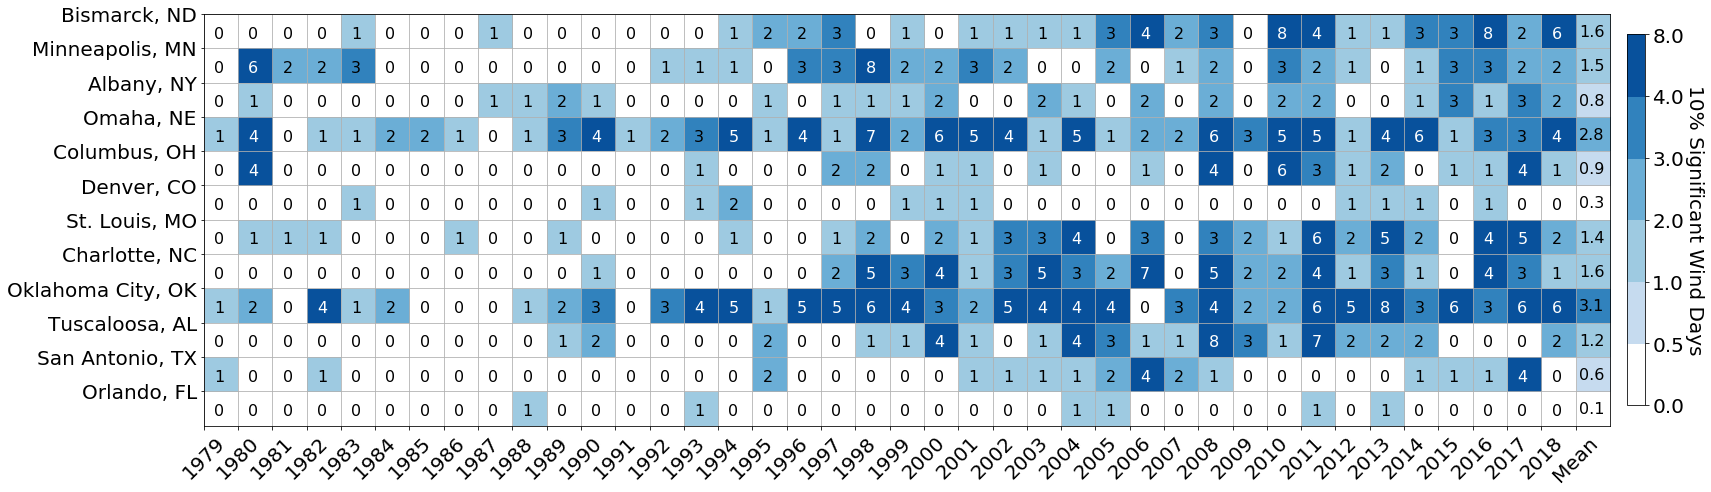

In [21]:
import matplotlib.patheffects as path_effects

plt.rcParams['figure.figsize'] = 30, 30
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20

ax = plt.subplot(2, 1, 1)

mmp = ax.imshow(city_dict,  norm=norm, cmap=cmap)

cbar = plt.colorbar(mmp, ax=ax, shrink=0.5, pad=0.01)
cbar.ax.get_yaxis().labelpad = 20
cbar.ax.set_ylabel('10% Significant Wind Days', fontsize=20, rotation=270)

yrlab = list(range(1979, 2019))
yrlab.append('Mean')
ax.set_xticks(np.array(list(range(41)))-.5);
ax.set_xticklabels(yrlab, rotation=45)

ax.set_yticks(np.array(list(range(12)))-.5)
ax.set_yticklabels(names)

for i in range(city_dict.shape[0]):
    for j in range(city_dict.shape[1]):
        
        value = city_dict[i, j]
        if j != 40:
            if value < 4:
                txt = ax.text(j-.2, i+.2, int(value), fontsize=16, color='black')
            else:
                txt = ax.text(j-.2, i+.2, int(value), fontsize=16, color='white')
        else:
            if value < 4:
                txt = ax.text(j-.4, i+.15, "{:.1f}".format(value), fontsize=16, color='black')
            else:
                txt = ax.text(j-.4, i+.15, "{:.1f}".format(value), fontsize=16, color='white')
                
ax.yaxis.grid(True, which='both')
ax.xaxis.grid(True, which='both')

plt.savefig(out_dir + "yearly_sig_wind_212.png", dpi=200, bbox_inches='tight')

# 5% Tornado, 15% Hail, or 15% Wind

In [22]:
from copy import deepcopy

tor_dset = xr.open_dataset('../data/tor_day_footprints_79-18_sid-212_grid.nc')
hail_dset = xr.open_dataset('../data/hail_day_footprints_79-18_sid-212_grid.nc')
wind_dset = xr.open_dataset('../data/wind_day_footprints_79-18_sid-212_grid.nc')


slgt_tor = deepcopy(tor_dset['pp_05'])
slgt_hail = deepcopy(hail_dset['pp_15'])
slgt_wind = deepcopy(wind_dset['pp_15'])

slight = 1*((slgt_tor + slgt_hail + slgt_wind)>0)

city_dict = np.zeros(shape=(12, 41))

names = []

ct = 0

for name, loc in cities.items():

    y, x = city_lookup[name]
    
    vals = slight.sel(y=y, x=x)

    vals = vals.groupby('time.year').sum()

    city_dict[ct, :40] = vals

    city_dict[ct, 40] = np.mean(vals)
    
    names.append(name)

    ct += 1

In [23]:
scale = [0,  1,  5, 10,  20, 30, np.max(city_dict)]

colors = ['#ffffff','#fee391','#fec44f','#fe9929','#d95f0e','#993404']

cmap = ListedColormap(colors)
norm = BoundaryNorm(scale, ncolors=cmap.N)

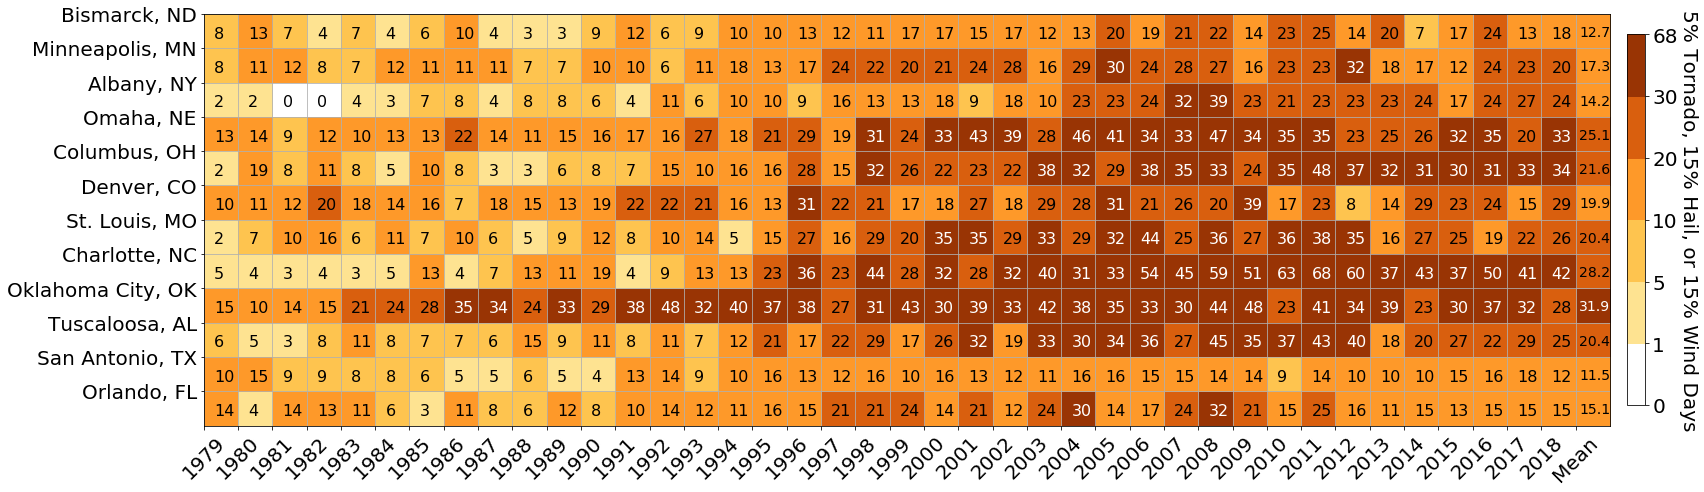

In [24]:
import matplotlib.patheffects as path_effects

plt.rcParams['figure.figsize'] = 30, 30
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20

ax = plt.subplot(2, 1, 1)

mmp = ax.imshow(city_dict,  norm=norm, cmap=cmap)

cbar = plt.colorbar(mmp, ax=ax, shrink=0.5, pad=0.01)
cbar.ax.get_yaxis().labelpad = 20
cbar.ax.set_ylabel('5% Tornado, 15% Hail, or 15% Wind Days', fontsize=20, rotation=270)

yrlab = list(range(1979, 2019))
yrlab.append('Mean')
ax.set_xticks(np.array(list(range(41)))-.5);
ax.set_xticklabels(yrlab, rotation=45)

ax.set_yticks(np.array(list(range(12)))-.5)
ax.set_yticklabels(names)

for i in range(city_dict.shape[0]):
    for j in range(city_dict.shape[1]):
        
        value = city_dict[i, j]
        if j != 40:
            if value < 30:
                txt = ax.text(j-.2, i+.2, int(value), fontsize=16, color='black')
            else:
                txt = ax.text(j-.2, i+.2, int(value), fontsize=16, color='white')
        else:
            if value < 30:
                txt = ax.text(j-.4, i+.15, "{:.1f}".format(value), fontsize=14, color='black')
            else:
                txt = ax.text(j-.4, i+.15, "{:.1f}".format(value), fontsize=14, color='white')
                
ax.yaxis.grid(True, which='both')
ax.xaxis.grid(True, which='both')

plt.savefig(out_dir + "yearly_slight_212.png", dpi=200, bbox_inches='tight')

# 10% Sig Tor, 10% Sig Hail, or 10% Sig. Wind

In [25]:
from copy import deepcopy

tor_dset = xr.open_dataset('../data/sig_tor_day_footprints_79-18_sid-212_grid.nc')
hail_dset = xr.open_dataset('../data/sig_hail_day_footprints_79-18_sid-212_grid.nc')
wind_dset = xr.open_dataset('../data/sig_wind_day_footprints_79-18_sid-212_grid.nc')


mod_tor = deepcopy(tor_dset['pp_10'])
mod_hail = deepcopy(hail_dset['pp_10'])
mod_wind = deepcopy(wind_dset['pp_10'])

moderate = 1*((mod_tor + mod_hail + mod_wind)>0)

city_dict = np.zeros(shape=(12, 41))

names = []

ct = 0

for name, loc in cities.items():

    y, x = city_lookup[name]
    
    vals = moderate.sel(y=y, x=x)

    vals = vals.groupby('time.year').sum()

    city_dict[ct, :40] = vals

    city_dict[ct, 40] = np.mean(vals)
    
    names.append(name)

    ct += 1

In [26]:
scale = [0,  1,  2, 4,  6, 8, np.max(city_dict)]

colors = ['#ffffff','#fee391','#fec44f','#fe9929','#d95f0e','#993404']

cmap = ListedColormap(colors)
norm = BoundaryNorm(scale, ncolors=cmap.N)

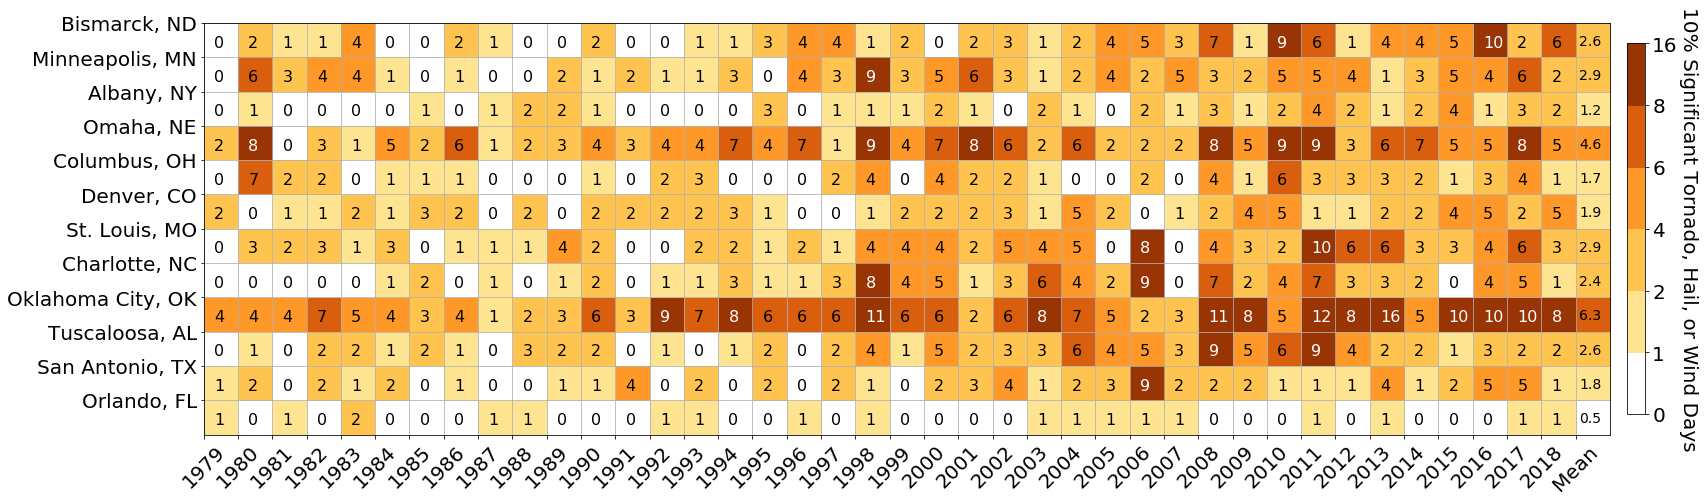

In [27]:
import matplotlib.patheffects as path_effects

plt.rcParams['figure.figsize'] = 30, 30
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20

ax = plt.subplot(2, 1, 1)

mmp = ax.imshow(city_dict,  norm=norm, cmap=cmap)

cbar = plt.colorbar(mmp, ax=ax, shrink=0.5, pad=0.01)
cbar.ax.get_yaxis().labelpad = 20
cbar.ax.set_ylabel('10% Significant Tornado, Hail, or Wind Days', fontsize=20, rotation=270)

yrlab = list(range(1979, 2019))
yrlab.append('Mean')
ax.set_xticks(np.array(list(range(41)))-.5);
ax.set_xticklabels(yrlab, rotation=45)

ax.set_yticks(np.array(list(range(12)))-.5)
ax.set_yticklabels(names)

for i in range(city_dict.shape[0]):
    for j in range(city_dict.shape[1]):
        
        value = city_dict[i, j]
        if j != 40:
            if value < 8:
                txt = ax.text(j-.2, i+.2, int(value), fontsize=16, color='black')
            else:
                txt = ax.text(j-.2, i+.2, int(value), fontsize=16, color='white')
        else:
            if value < 8:
                txt = ax.text(j-.4, i+.15, "{:.1f}".format(value), fontsize=14, color='black')
            else:
                txt = ax.text(j-.4, i+.15, "{:.1f}".format(value), fontsize=14, color='white')
                
ax.yaxis.grid(True, which='both')
ax.xaxis.grid(True, which='both')

plt.savefig(out_dir + "yearly_mod_212.png", dpi=200, bbox_inches='tight')